# Iris Flowers Classification ML Project

# Notebook setup

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set()

# Load data

 Load the Iris dataset from the UCI repository.

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [6]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']

 Create a Pandas dataframe from data 

In [7]:
df = pd.read_csv(url, header=None, names=columns)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
class_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# What problem are we trying to solve?

We are trying to use the 4 attributes of the flowers to prdict the species of the flower. We are trying to use the sepal length and width and the petal length and width to predict if an iris flower is of type _Setosa_, _Versicolor_, or _Virginica_.

This is a multiclass classifiction problem.

# Basic descriptive statistics

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
print(df['class'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


# Distribution of features and targets

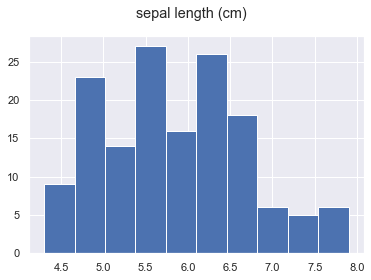

In [11]:
col = 'sepal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

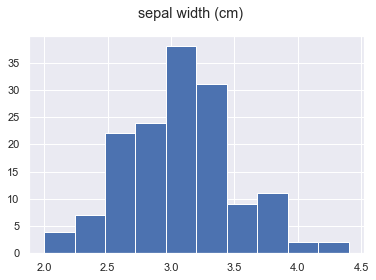

In [12]:
col = 'sepal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

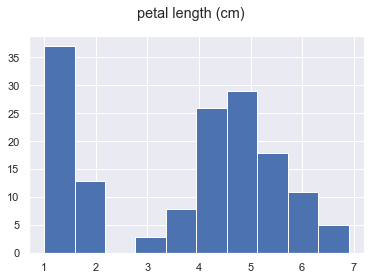

In [13]:
col = 'petal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

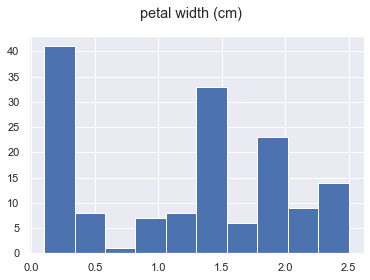

In [14]:
col = 'petal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

# Relationship of the data features with the target

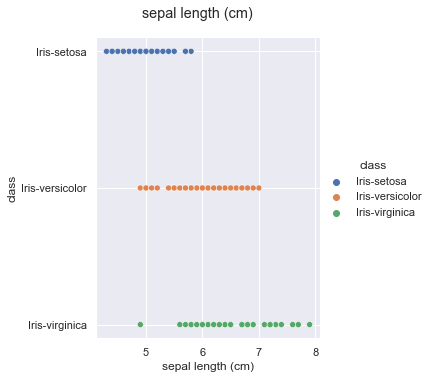

In [15]:
col = 'sepal length (cm)'
sns.relplot(x=col, y='class', hue='class', data=df)
_ = plt.suptitle(col, y=1.05)

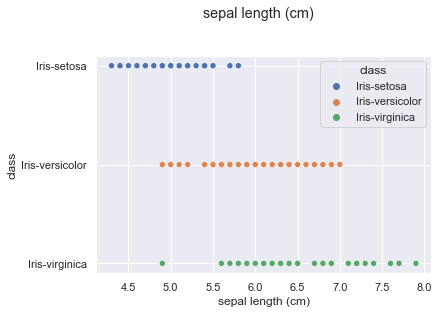

In [16]:
col = 'sepal length (cm)'
sns.scatterplot(x=col, y='class', hue='class', data=df)
_ = plt.suptitle(col, y=1.05)

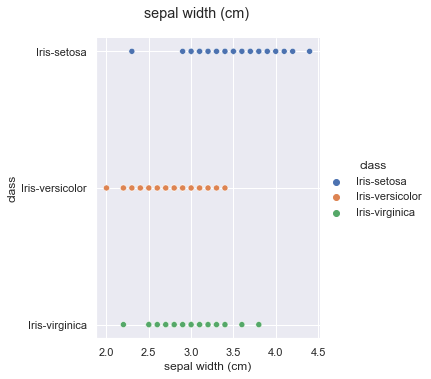

In [17]:
col = 'sepal width (cm)'
sns.relplot(x=col, y='class', hue='class', data=df)
_ = plt.suptitle(col, y=1.05)

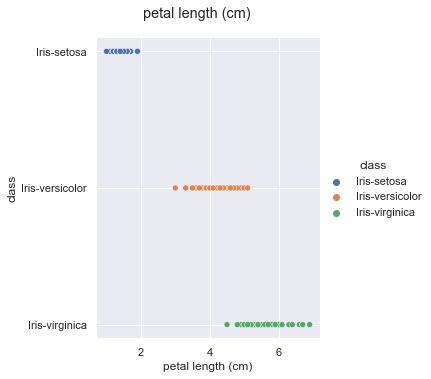

In [18]:
col = 'petal length (cm)'
sns.relplot(x=col, y='class', hue='class', data=df)
_ = plt.suptitle(col, y=1.05)

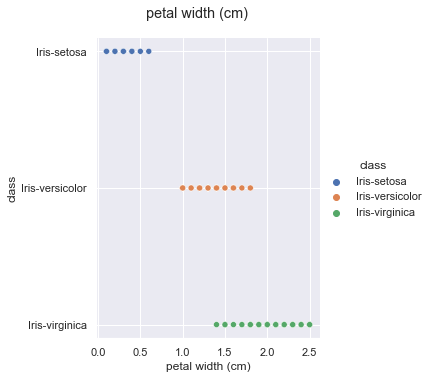

In [19]:
col = 'petal width (cm)'
sns.relplot(x=col, y='class', hue='class', data=df)
_ = plt.suptitle(col, y=1.05)

# Exploratory Data Analysis(EDA) - Pairplots

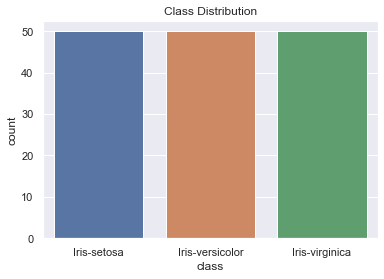

In [20]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

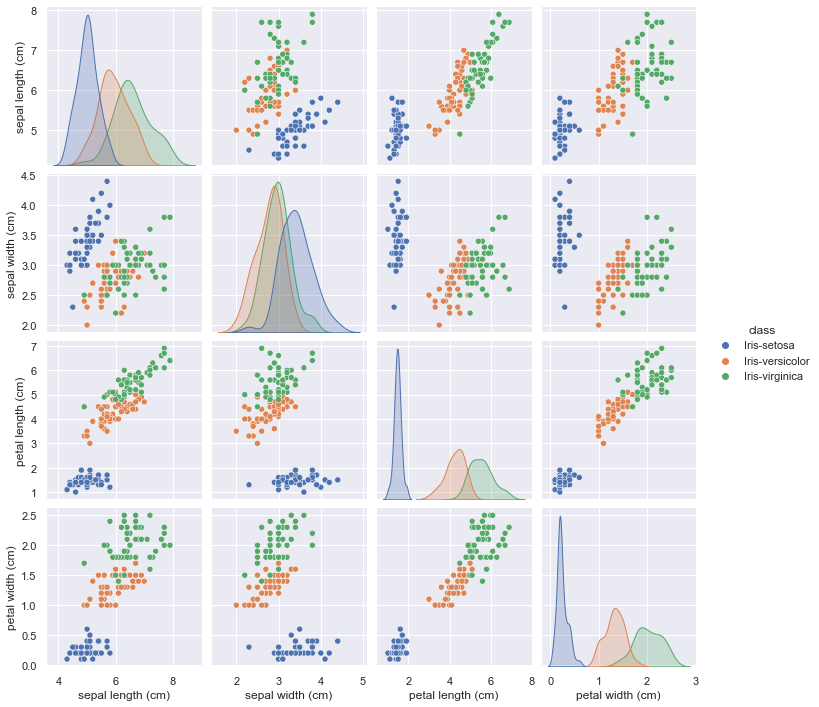

In [21]:
sns.pairplot(df, hue="class")
plt.show()

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [24]:
df_train.shape

(112, 5)

In [25]:
df_test.shape

(38, 5)

In [26]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
9,4.9,3.1,1.5,0.1,Iris-setosa
104,6.5,3.0,5.8,2.2,Iris-virginica
55,5.7,2.8,4.5,1.3,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor


Prepare our data for modelling 

In [27]:
x_train = df_train.drop(columns=['class']).values
y_train = df_train['class'].values

# Modeling - Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#### Using a validation set to evaluate our model

In [29]:
model = LogisticRegression(max_iter=200)

In [30]:
# x stands for "x_train" and xv stands for "x_validation"
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

In [31]:
 model.fit(xt, yt)

LogisticRegression(max_iter=200)

In [32]:
y_pred = model.predict(xv)

In [33]:
np.mean(y_pred == yv)

0.8214285714285714

In [34]:
model.score(x_train, y_train)

0.9196428571428571

In [35]:
model.score(xv, yv)

0.8214285714285714

#### Using cross-validation to evaluate our model

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict  # Add cross_val_score import


In [40]:
model = LogisticRegression(max_iter=200)

In [41]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")

In [42]:
np.mean(accuracies)

0.9553359683794467

## Where are we misclassifying points?


In [55]:
y_pred = cross_val_predict(model, x_train, y_train, cv=5)

In [56]:
predicted_correctly_mask = y_pred == y_train

In [57]:
not_predicted_correctly = ~predicted_correctly_mask

In [58]:
x_train[not_predicted_correctly]

array([[4.9, 2.5, 4.5, 1.7],
       [6. , 2.7, 5.1, 1.6],
       [6. , 2.2, 5. , 1.5],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8]])

In [81]:
class_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [82]:
class_name_to_id = {name: i for i, name in enumerate(class_name)}
y_train_ids = np.array([class_name_to_id[name] for name in y_train])
y_pred_ids = np.array([class_name_to_id[name] for name in y_pred]) 

In [83]:
df_predictions = df_train.copy()

In [84]:
df_predictions["correct_prediction"] = predicted_correctly_mask

In [85]:
df_predictions["prediction"] = y_pred_ids

In [86]:
df_predictions["prediction_label"] = df_predictions["prediction"].map({0: class_name[0], 1: class_name[1], 2: class_name[2]})

In [87]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,correct_prediction,prediction,prediction_label
9,4.9,3.1,1.5,0.1,Iris-setosa,True,0,Iris-setosa
104,6.5,3.0,5.8,2.2,Iris-virginica,True,2,Iris-virginica
55,5.7,2.8,4.5,1.3,Iris-versicolor,True,1,Iris-versicolor
11,4.8,3.4,1.6,0.2,Iris-setosa,True,0,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor,True,1,Iris-versicolor


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

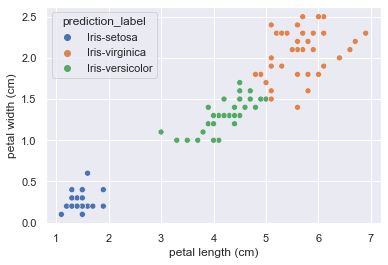

In [91]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="prediction_label", data=df_predictions)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

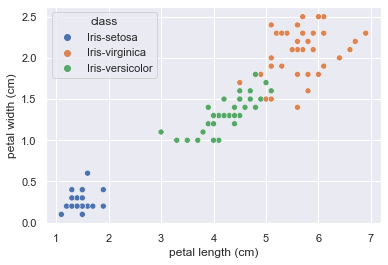

In [92]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="class", data=df_predictions)

In [110]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10)) 
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0] )
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="class", data=df_predictions, ax=axs[1] )
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2] )
    axs[3].set_visible(False)
    plt.show()

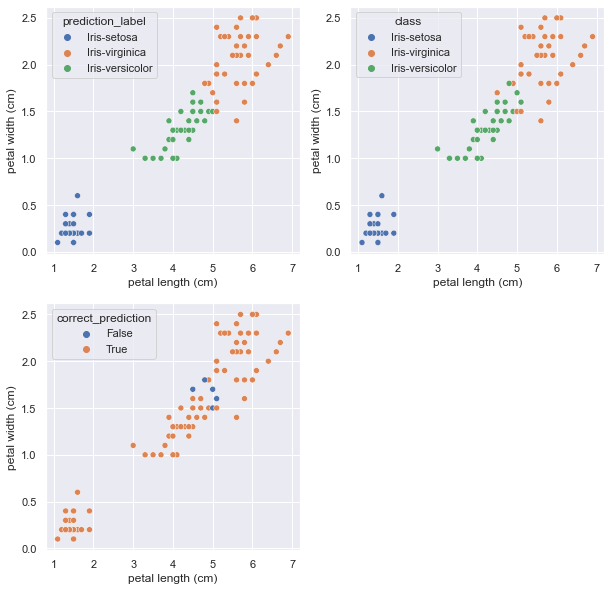

In [111]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

# Model Tuning

In [132]:
for reg_param in (1, 2, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    print(f"Accuracy: {np.mean(accuracies) * 100:.2f}%")

1
Accuracy: 95.53%
2
Accuracy: 96.44%
3
Accuracy: 97.31%
3.1
Accuracy: 97.31%
3.2
Accuracy: 97.31%
3.3
Accuracy: 97.31%
3.4
Accuracy: 97.31%
3.5
Accuracy: 97.31%
3.6
Accuracy: 97.31%


# Final model

In [133]:
model = LogisticRegression(max_iter=200, C=3.5)

In [134]:
x_test = df_test.drop(columns=['class']).values
y_test = df_test['class'].values

In [135]:
x_test.shape

(38, 4)

In [136]:
y_test

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

### Train our final model using our full Training dataset

In [137]:
model.fit(x_train, y_train)

LogisticRegression(C=3.5, max_iter=200)

In [139]:
y_test_pred = model.predict(x_test)

In [140]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)   

In [142]:
print(f"Test set accuaracy:{test_set_accuracy * 100:.2f}")

Test set accuaracy:100.00


# Conclusion


#### In conclusion, we achieved a 100% accuracy on the test dataset using a Logistic Regression model with these model parameters:

LogisticRegression(C=3.5, max_iter=200)  
